# Trabajo Final Inteligencia Artificial I - año 2018: Visión Artificial
---

# Dependencias
---

In [3]:
import numpy as np

from matplotlib import pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

from skimage import io, color, img_as_float, img_as_ubyte, filters
from skimage.feature import hog
import os
import mahotas
import cv2

## Funciones definidas

* Representación:

In [5]:
def img2grey(image, mode='sk'):
    if (mode=='sk'):
        gray = color.rgb2gray(image)
    elif (mode=='cv'):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray

def normSize(image, size=(tuple((400, 300)))):
    cv2.resize(image, size)

* Filtración:

In [4]:
def imgClean(image, sigma=1):
    clean = filters.gaussian(image, sigma)
    return clean

def imgEdge(image, sigma=1):
    aux = imgClean(image, sigma)
    edge = filters.sobel(aux)
    return edge

* Extracción de características:

In [2]:
def hu_moments(image):
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

def haralick(image):
    feature= mahotas.features.haralick(image).mean(axis=0)
    return feature

## Información global

In [7]:
data_path = './data'

# Importar base de datos
---

## Labels

Se obtiene el label de cada categoría y se lo ordena alfabeticamente. Los labels están dado por la estructura de carpetas: las imágenes de naranjas están en la carpeta "[orange](./data/orange)", las de bananas en la carpeta "[banana](./data/banana)" y las de limones en la carpeta "[lemon](./data/lemon)", todo esto dentro de la carpeta "[data](./data)".

In [10]:
data_labels = os.listdir(data_path)

data_labels.sort()
print(data_labels)

['banana', 'lemon', 'orange']


In [3]:
banana = io.ImageCollection('./data/banana/*.png:./data/banana/*.jpg')
orange = io.ImageCollection('./data/orange/*.png:./data/orange/*.jpg')
lemon = io.ImageCollection('./data/lemon/*.png:./data/lemon/*.jpg')

## Bananas

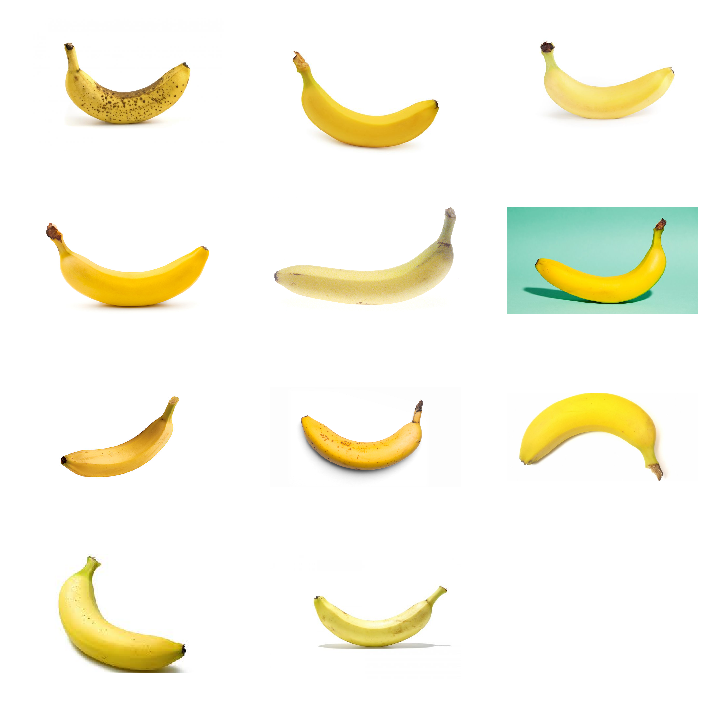

In [4]:
f, axes = plt.subplots(nrows=len(banana) // 3 + 1, ncols=3, figsize=(10, 10))

axes = axes.ravel()

for ax in axes:
    ax.axis('off')

for i, image in enumerate(banana):
    axes[i].imshow(image, cmap='gray')
    
plt.tight_layout()

## Naranjas

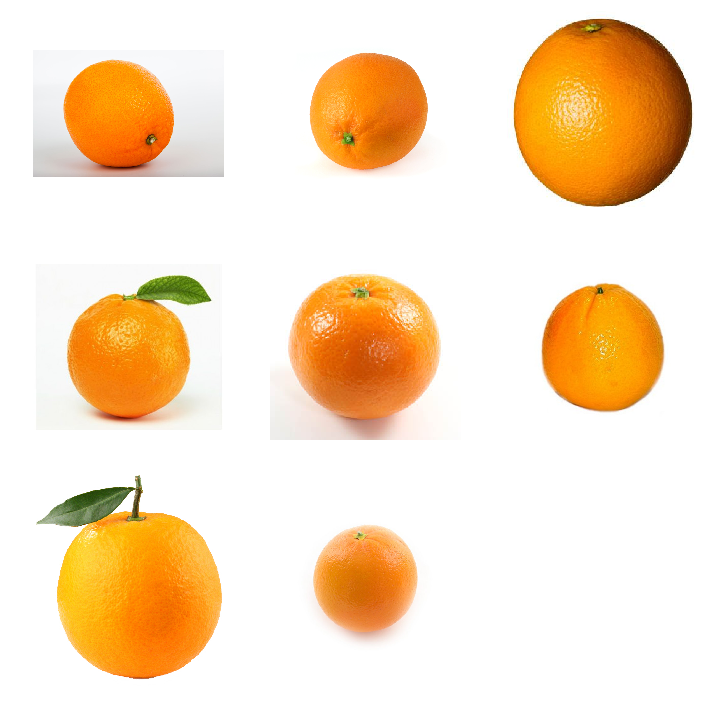

In [5]:
f, axes = plt.subplots(nrows=len(orange) // 3 + 1, ncols=3, figsize=(10, 10))

axes = axes.ravel()

for ax in axes:
    ax.axis('off')

for i, image in enumerate(orange):
    axes[i].imshow(image, cmap='gray')
    
plt.tight_layout()

## Limones

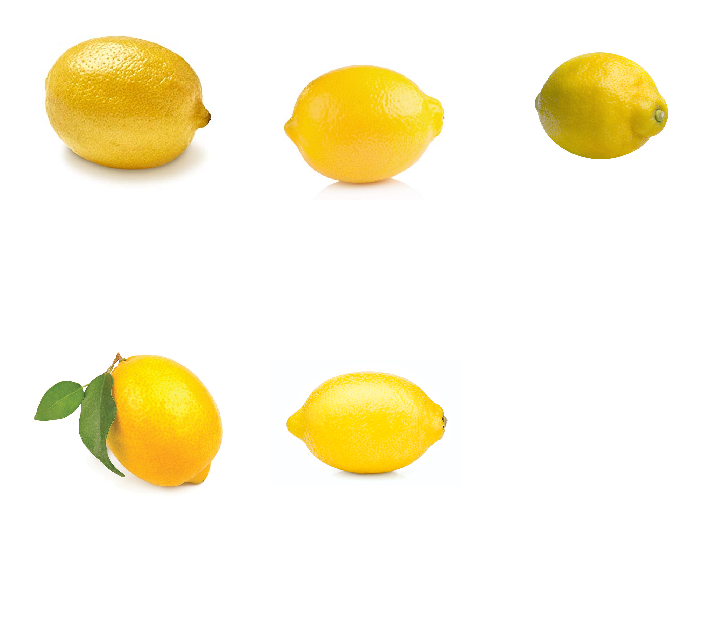

In [6]:
f, axes = plt.subplots(nrows=len(lemon) // 3 + 1, ncols=3, figsize=(10, 10))

# subplots returns the figure and an array of axes
# we use `axes.ravel()` to turn these into a list
axes = axes.ravel()

for ax in axes:
    ax.axis('off')

for i, image in enumerate(lemon):
    axes[i].imshow(image, cmap='gray')
    #axes[i].set_title(os.path.basename(ic.files[i]))
    
plt.tight_layout()

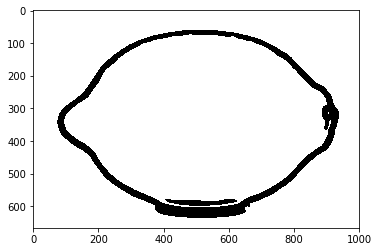

In [29]:
img_float = img_as_float(lemon[4])
img = color.rgb2gray(img_float)
bg = filters.gaussian(img, sigma=7)
bc = filters.sobel(bg)

th = filters.threshold_otsu(bc)
bf = bc < th

f, ax = plt.subplots()

ax.imshow(bf)

# Comparación

### Entre naranja, banana y limón

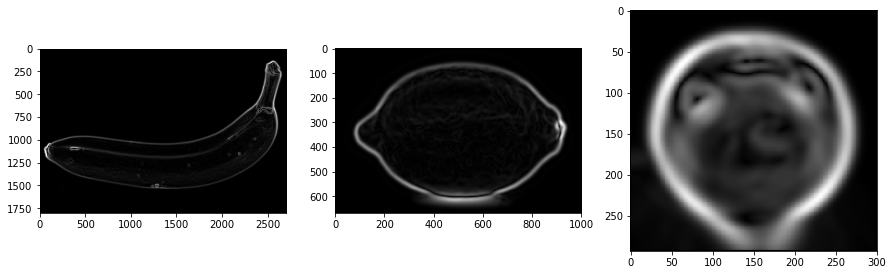

In [30]:
img_float = img_as_float(lemon[4])
lemon = color.rgb2gray(img_float)

img_float = img_as_float(banana[4])
banana = color.rgb2gray(img_float)

img_float = img_as_float(orange[4])
orange = color.rgb2gray(img_float)

lg = filters.gaussian(lemon, sigma=7)
lc = filters.sobel(lg)

bg = filters.gaussian(banana, sigma=7)
bc = filters.sobel(bg)

og = filters.gaussian(orange, sigma=7)
oc = filters.sobel(og)

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 15))

ax0.imshow(bc)
ax1.imshow(lc)
ax2.imshow(oc)

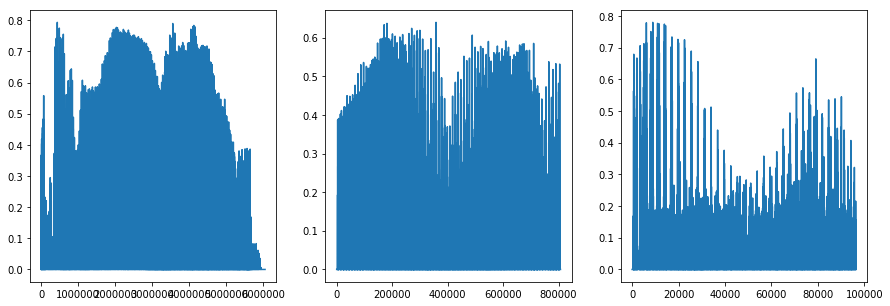

In [31]:
banana_feat = hog(bc).ravel()
lemon_feat = hog(lc).ravel()
orange_feat = hog(oc).ravel()

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 5))

ax0.plot(banana_feat)
ax1.plot(lemon_feat)
ax2.plot(orange_feat)

### Entre tres bananas diferentes

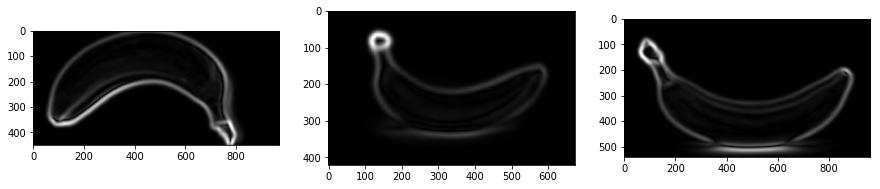

In [8]:
img1 = img_as_float(banana[8])
b1 = color.rgb2gray(img1)

img_float = img_as_float(banana[2])
b2 = color.rgb2gray(img_float)

img_float = img_as_float(banana[3])
b3 = color.rgb2gray(img_float)

bg1 = filters.gaussian(b1, sigma=7)
bc1 = filters.sobel(bg1)

bg2 = filters.gaussian(b2, sigma=7)
bc2 = filters.sobel(bg2)

bg3 = filters.gaussian(b3, sigma=7)
bc3 = filters.sobel(bg3)

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 15))

ax0.imshow(bc1)
ax1.imshow(bc2)
ax2.imshow(bc3)

/usr/lib/python3.7/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


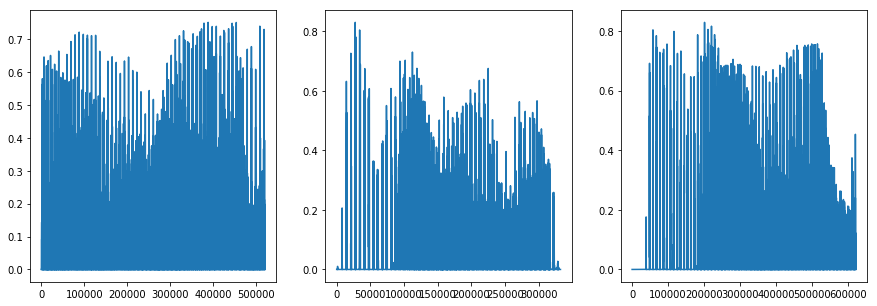

In [9]:
b1_feat = hog(bc1).ravel()
b2_feat = hog(bc2).ravel()
b3_feat = hog(bc3).ravel()

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 5))

ax0.plot(b1_feat)
ax1.plot(b2_feat)
ax2.plot(b3_feat)